# spectrafit.py example

This module constains a set of functions designed to fit a model consisting of a sum of pseudo-Voigt profiles to already baseline subtracted Raman spectroscopy data. These functions are primarily accessed in an automated fashion via the dataprep.py module.

This module contains the following functions:
1. spectrafit.peak_detect( )
2. spectrafit.set_parmas( )
3. spectrafit.model_fit( )
4. spectrafit.plot_fit( )
5. spectrafit.export_fit_data( )
6. spectrafit.fit_data( )
7. spectrafit.build_custom_model( )
8. spectrafit.apply_old_model( )
9. spectrafit.superimpose_next( )
10. spectrafit.superimpose_set( )

Developed by the Raman-Noodles team (2019 DIRECT Cohort, University of Washington)

In [9]:
# imports
import h5py
import numpy as np
from shutil import copyfile
from ramandecompy import spectrafit

We will open an example hdf5 file that contains formic acid mixture spectra at 300C and various residence times

In [11]:
hdf5 = h5py.File('../ramandecompy/tests/test_files/test_experiment.hdf5', 'r')
x_data = np.asarray(hdf5['300C/25s/wavenumber'])
y_data = np.asarray(hdf5['300C/25s/counts'])
hdf5.close()

### spectrafit.peak_detect
    A function that utilizes scipy to identify local maxima from input spectral data. Default
    detection criteria are based upon normalized values for the y axis (counts) spectra data;
    however, the option remains to adjust the parameters to achieve the best fit, if the user
    so chooses.
    
    These detected peaks are used next to begin to define a regression model.

In [16]:
peaks, peak_list = spectrafit.peak_detect(x_data, y_data)
peaks

[(314.77, 14.96795),
 (378.71, 104.63),
 (418.14, 700.0),
 (448.67, 38.0575),
 (578.11, 118.9575),
 (711.51, 172.735),
 (751.21, 253.375),
 (1055.9, 45.846000000000004),
 (1217.6, 247.8775),
 (1400.1, 340.66),
 (1649.3, 373.78),
 (1714.9, 530.63),
 (2137.9, 24.81825),
 (2328.9, 30.69175),
 (2948.2, 93.00025),
 (3185.1, 260.8875)]

### spectrafit.set_params
    This function takes in the list of peaks from the peak detection modules, and then uses
    that to initialize parameters for a set of Pseudo-Voigt models that are not yet fit.
    There is a single model for every peak.

    This model and intial guess parameters are then used to fit the spectra data.

In [17]:
mod, pars = spectrafit.set_params(peaks)

### spectrafit.model_fit
    This function takes in the x and y data for the spectrum being analyzed, as well as the model
    parameters that were generated in `set_params` for each individual peak, and uses it to generate
    a fit for the model at each peak position, then returns that fit.
    
    This function utilizes a powell regression method. The optional reporting feature allows the user to see
    how the best fit compares to the initial guess.

In [19]:
out = spectrafit.model_fit(x_data, y_data, mod, pars, report=True)

[[Model]]
    (((((((((((((((Model(pvoigt, prefix='p1_') + Model(pvoigt, prefix='p2_')) + Model(pvoigt, prefix='p3_')) + Model(pvoigt, prefix='p4_')) + Model(pvoigt, prefix='p5_')) + Model(pvoigt, prefix='p6_')) + Model(pvoigt, prefix='p7_')) + Model(pvoigt, prefix='p8_')) + Model(pvoigt, prefix='p9_')) + Model(pvoigt, prefix='p10_')) + Model(pvoigt, prefix='p11_')) + Model(pvoigt, prefix='p12_')) + Model(pvoigt, prefix='p13_')) + Model(pvoigt, prefix='p14_')) + Model(pvoigt, prefix='p15_')) + Model(pvoigt, prefix='p16_'))
[[Fit Statistics]]
    # fitting method   = Powell
    # function evals   = 16720
    # data points      = 1941
    # variables        = 48
    chi-square         = 464281.415
    reduced chi-square = 245.262237
    Akaike info crit   = 10727.4152
    Bayesian info crit = 10994.8212
[[Variables]]
    p1_fraction:    2.6663e-06 (init = 0.5)
    p1_sigma:       9.47784158 (init = 10)
    p1_center:      314.77 (fixed)
    p1_amplitude:   251.852665 (init = 1496.795)
  

### spectrafit.plot_fit
    This function plots the fit, each individual pseudo-Voigt profile, and the orginal data for
    visual examination.
    
    It is primarily used as a visual inspection tool. A scientist can quickly identify nonsensical
    fit results in some cases before moving on to further analysis. Since this automatic peak detection
    only is capable of identifying local maxima in the spectra, overlapping peaks are not always detected.
    Later functions will allow for the custom addition and removal of peaks from this auto

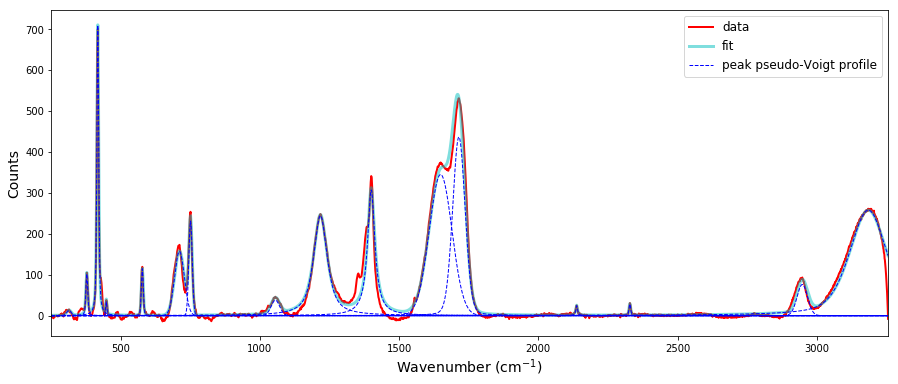

In [21]:
spectrafit.plot_fit(x_data, y_data, out, plot_components=True)

### spectrafit.export_fit_data
    This function returns fit information for an input lmfit model set as well as calculates
    the area under each individual pseudo-Voigt profile. It specifically formats these values
    as a list of lists that later functions will use to save the values into a .hdf5 file.

In [25]:
fit_results, residuals = spectrafit.export_fit_data(x_data, y_data, out)
fit_results

[[2.6663343662414185e-06,
  9.47784157647681,
  314.77,
  251.85266516909158,
  18.95568315295362,
  12.481722612766571,
  251.85253918930138],
 [0.5068131437798339,
  4.012901866707115,
  378.71,
  1034.0055674054267,
  8.02580373341423,
  101.25996252105841,
  1028.5887071980997],
 [0.6367815603244544,
  3.8475935994386825,
  418.14,
  7306.162435095841,
  7.695187198877365,
  708.8643993377336,
  7270.348695381032],
 [2.5523040143748954e-05,
  2.6996218653839077,
  448.67,
  193.73417517489642,
  5.399243730767815,
  33.708352142555285,
  193.7406253262912],
 [0.18866606541747744,
  4.210622397807715,
  578.11,
  1090.4680133146153,
  8.42124479561543,
  114.24989721919599,
  1089.487881792328],
 [2.4424906541753444e-15,
  20.497872123028607,
  711.51,
  6837.146956393162,
  40.995744246057214,
  156.67652457367774,
  6837.146565168508],
 [6.887108716102652e-07,
  7.194622077882865,
  751.21,
  3533.4394037901616,
  14.38924415576573,
  230.689251297801,
  3533.443153749849],
 [0.0,